In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import numpy as np

df = pd.read_csv(r'C:\Users\parte\Desktop\lab-eda-univariate\amz_uk_price_prediction_dataset.csv')

In [4]:
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [5]:
category_freq = df['category'].value_counts().head(5)  # Top 5 categories

# Display the frequency table
print("Top 5 Most Listed Product Categories:")
print(category_freq)



Top 5 Most Listed Product Categories:
category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64


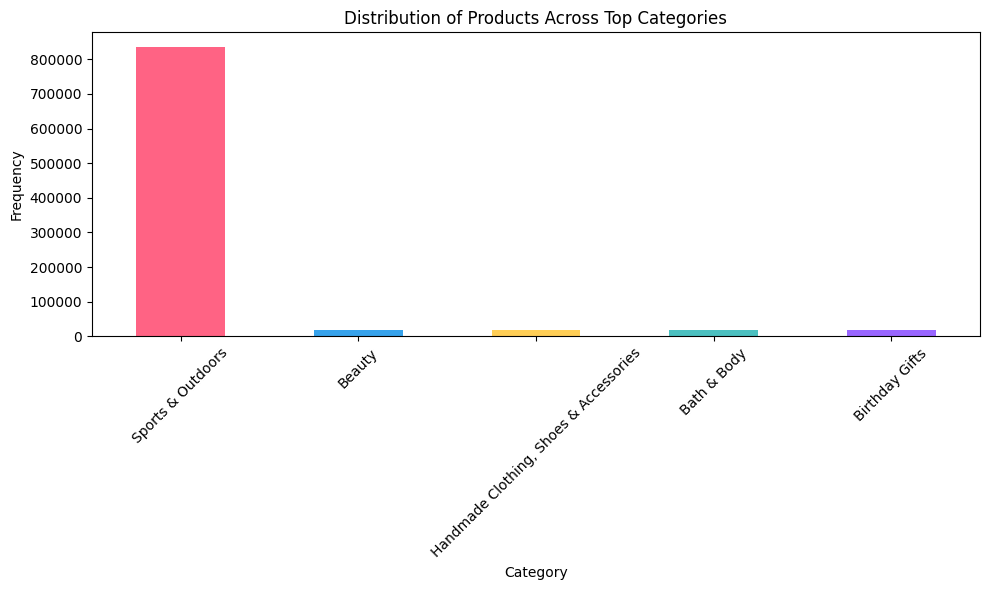

In [6]:
# Bar Chart: Distribution of Products Across Top Categories
plt.figure(figsize=(10, 6))
category_freq.plot(kind='bar', color=['#FF6384', '#36A2EB', '#FFCE56', '#4BC0C0', '#9966FF'])
plt.title('Distribution of Products Across Top Categories')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



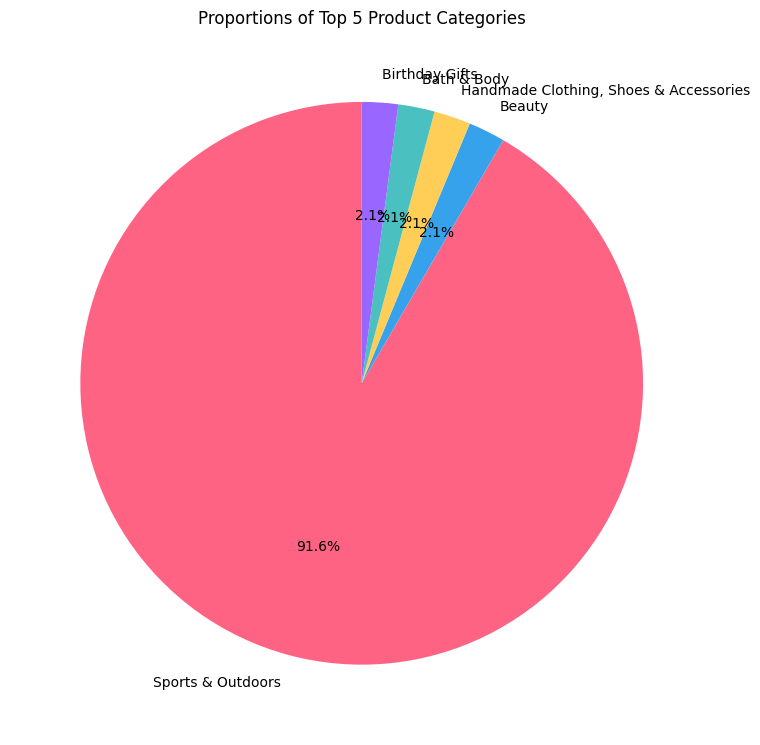

In [7]:
# Pie Chart: Proportions of Top Categories
plt.figure(figsize=(8, 8))
category_freq.plot(kind='pie', autopct='%1.1f%%', colors=['#FF6384', '#36A2EB', '#FFCE56', '#4BC0C0', '#9966FF'], startangle=90)
plt.title('Proportions of Top 5 Product Categories')
plt.ylabel('')  # Hide y-label for pie chart
plt.tight_layout()
plt.show()

In [8]:
# 1. Measures of Centrality
print("Measures of Centrality:")
mean_price = df['price'].mean()
median_price = df['price'].median()
mode_price = df['price'].mode()[0]  # Mode returns a Series, take the first value
print(f"Mean: £{mean_price:.2f}")
print(f"Median: £{median_price:.2f}")
print(f"Mode: £{mode_price:.2f}")
print(f"Average price point: £{mean_price:.2f}, compared to the most common price point (mode): £{mode_price:.2f}")

Measures of Centrality:
Mean: £89.24
Median: £19.09
Mode: £9.99
Average price point: £89.24, compared to the most common price point (mode): £9.99


In [9]:
# 2. Measures of Dispersion
print("\nMeasures of Dispersion:")
variance_price = df['price'].var()
std_dev_price = df['price'].std()
price_range = df['price'].max() - df['price'].min()
q1 = df['price'].quantile(0.25)
q3 = df['price'].quantile(0.75)
iqr = q3 - q1
print(f"Variance: £{variance_price:.2f}")
print(f"Standard Deviation: £{std_dev_price:.2f}")
print(f"Range: £{price_range:.2f}")
print(f"Interquartile Range (IQR): £{iqr:.2f}")
print("Price variation is significant if standard deviation is large relative to the mean, and IQR/range suggests spread.")


Measures of Dispersion:
Variance: £119445.49
Standard Deviation: £345.61
Range: £100000.00
Interquartile Range (IQR): £36.00
Price variation is significant if standard deviation is large relative to the mean, and IQR/range suggests spread.


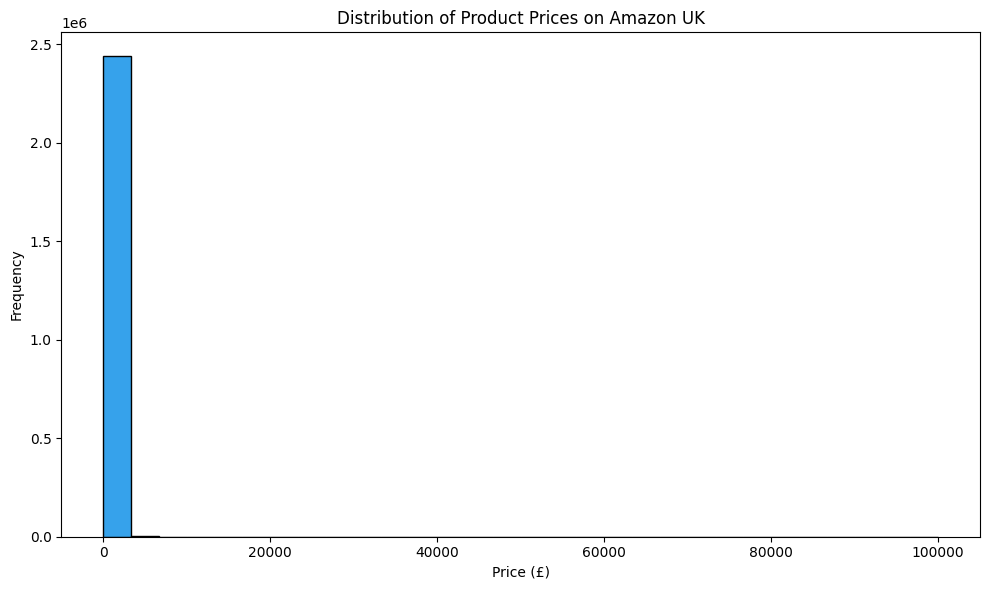

In [10]:
# 3. Visualizations
# Histogram
plt.figure(figsize=(10, 6))
plt.hist(df['price'], bins=30, color='#36A2EB', edgecolor='black')
plt.title('Distribution of Product Prices on Amazon UK')
plt.xlabel('Price (£)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

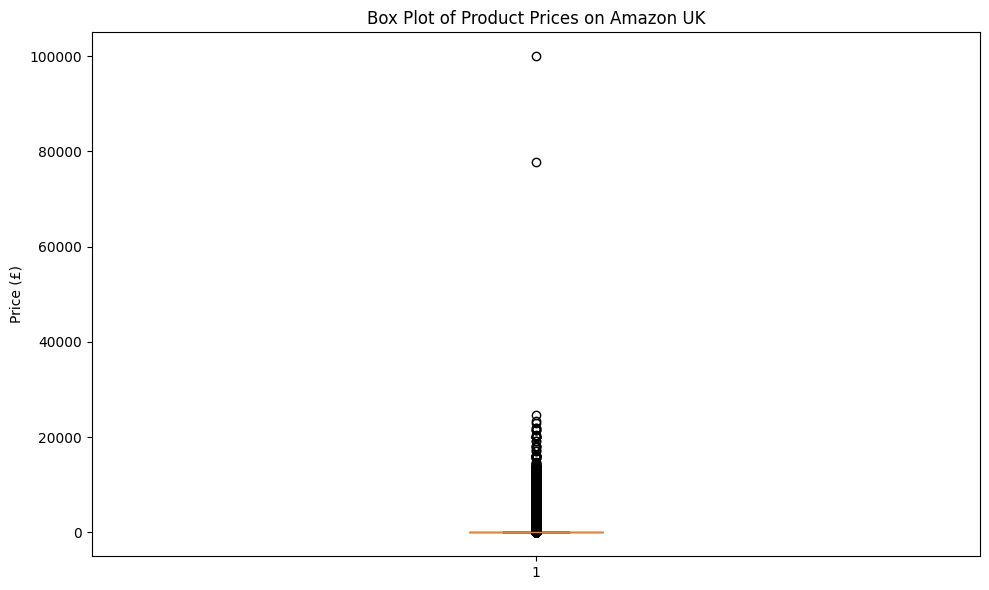

In [11]:
# Box Plot
plt.figure(figsize=(10, 6))
plt.boxplot(df['price'], vert=True, patch_artist=True, boxprops=dict(facecolor='#FF6384'))
plt.title('Box Plot of Product Prices on Amazon UK')
plt.ylabel('Price (£)')
plt.tight_layout()
plt.show()

In [14]:
print(df.columns)

Index(['uid', 'asin', 'title', 'stars', 'reviews', 'price', 'isBestSeller',
       'boughtInLastMonth', 'category'],
      dtype='object')


In [15]:
# 1. Measures of Centrality
import scipy.stats as stats
print("Measures of Centrality:")
mean_rating = df['stars'].mean()
median_rating = df['stars'].median()
mode_rating = df['stars'].mode()[0]  # Take the first mode if multiple
print(f"Mean Rating: {mean_rating:.2f}")
print(f"Median Rating: {median_rating:.2f}")
print(f"Mode Rating: {mode_rating:.2f}")
print(f"General rating trend: Customers tend to rate around {mean_rating:.2f} on average, with {mode_rating:.2f} being the most common rating.")

Measures of Centrality:
Mean Rating: 2.15
Median Rating: 0.00
Mode Rating: 0.00
General rating trend: Customers tend to rate around 2.15 on average, with 0.00 being the most common rating.


In [17]:
# 2. Measures of Dispersion
print("\nMeasures of Dispersion:")
variance_rating = df['stars'].var()
std_dev_rating = df['stars'].std()
q1 = df['stars'].quantile(0.25)
q3 = df['stars'].quantile(0.75)
iqr_rating = q3 - q1
print(f"Variance: {variance_rating:.2f}")
print(f"Standard Deviation: {std_dev_rating:.2f}")
print(f"Interquartile Range (IQR): {iqr_rating:.2f}")
print(f"Rating consistency: A low standard deviation ({std_dev_rating:.2f}) suggests consistency; a high value indicates variation.")


Measures of Dispersion:
Variance: 4.82
Standard Deviation: 2.19
Interquartile Range (IQR): 4.40
Rating consistency: A low standard deviation (2.19) suggests consistency; a high value indicates variation.


In [18]:
# 3. Shape of the Distribution
print("\nShape of the Distribution:")
skewness = stats.skew(df['stars'].dropna())
kurtosis = stats.kurtosis(df['stars'].dropna())
print(f"Skewness: {skewness:.2f} (Positive > 0 indicates right skew, negative < 0 indicates left skew)")
print(f"Kurtosis: {kurtosis:.2f} (High value indicates heavy tails or peakedness)")
print(f"Distribution: Ratings are {'normally distributed' if -0.5 < skewness < 0.5 else 'skewed towards higher' if skewness > 0 else 'skewed towards lower'} values.")


Shape of the Distribution:
Skewness: 0.08 (Positive > 0 indicates right skew, negative < 0 indicates left skew)
Kurtosis: -1.93 (High value indicates heavy tails or peakedness)
Distribution: Ratings are normally distributed values.


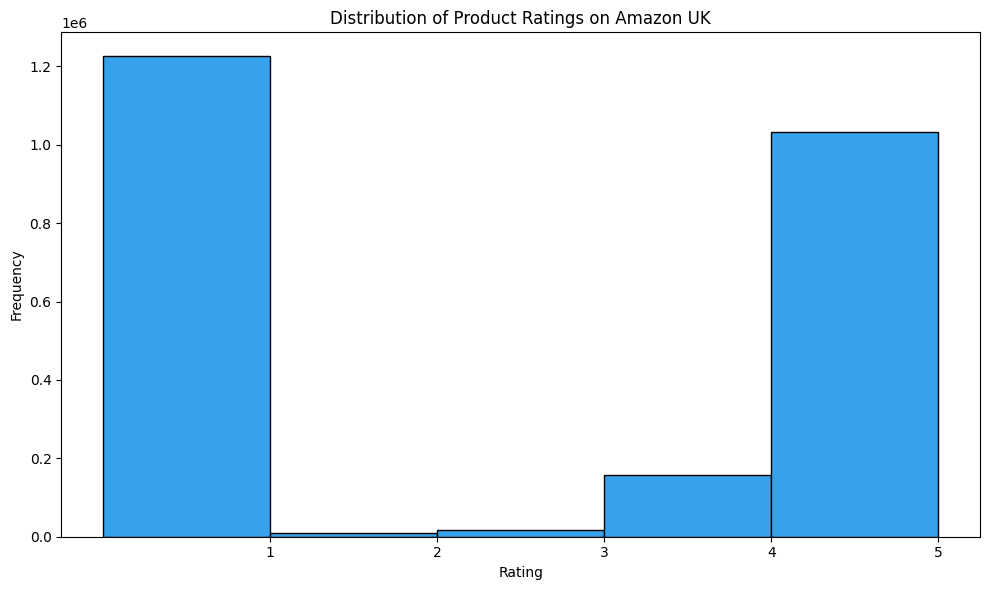

In [19]:
# 4. Visualizations
plt.figure(figsize=(10, 6))
plt.hist(df['stars'].dropna(), bins=5, color='#36A2EB', edgecolor='black')
plt.title('Distribution of Product Ratings on Amazon UK')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.xticks([1, 2, 3, 4, 5])
plt.tight_layout()
plt.show()